In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', None)

# Load hybel data

In [3]:
path="../data"
hybel_df = pd.read_csv(os.path.join(path,"hybel_baerum.csv"))
hybel_df["area_range"]=round(hybel_df["area"],-1)
hybel_df.sort_values('date')

,title,address,area,price,date,rent_out,rent_date,url,area_range
72,"Bekkestua/Høvik - Hybel med god standard. Møblert, alt inkludert, også strøm!","Høvikveien 39, Bekkestua",35,10500,01-02-2022,True,21-03-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=236613098,40
73,Nyoppusset 2 - roms,"NANNAS VEI 6, Rykkinn",30,8700,01-02-2022,True,04-03-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=169475689,30
74,"Leilighet på Slependen/Tanum, 50 kvm, møblert/fullt utstyrt","Hiltonåsen 11, Slependen",50,11000,01-02-2022,True,21-03-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=245179172,50
75,Fullt utstyrt hybelleilighet i landlige omgivelser på Vøyenenga,"Nedre Ringvoll 21, Vøyenenga",50,9500,02-02-2022,True,25-02-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=234194244,50
106,Vestvendt utleiedel med høy standard i 1. etasje på Haslum- langtidsleie ønskelig,"Lokes vei 3, Haslum",30,8900,02-03-2022,True,09-03-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=95513204,30
...,...,...,...,...,...,...,...,...,...
69,Ny sentralt beliggende hybelleilighet til leie,"Evje terrasse 4, Sandvika",36,10000,30-01-2022,True,16-03-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=246535995,40
68,Fin 2-roms med mulighet for leie av garasje,"HALDENSKOGVEIEN 13, Snarøya",30,8900,30-01-2022,True,22-02-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=72919714,30
67,"Moderne, fullmøblert og utstyrt med alt leilighet sentralt på Bekkestua, kort vei til NTG. Ledig omgående","NADDERUDVEIEN 21 B, Bekkestua",30,9900,30-01-2022,True,15-02-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=155396040,30
70,Hyggelig og romslig ett roms hybel til leie,"Åsliveien 4a, Stabekk",46,9500,31-01-2022,True,15-02-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=203603548,50


In [4]:
rentout_hybel=hybel_df[(hybel_df["rent_out"]==True) & (hybel_df["date"]>='11-01-2022')]
rentout_hybel.sort_values('rent_date')

,title,address,area,price,date,rent_out,rent_date,url,area_range
46,Koselig og pen hybel/leilighet på 45kvm leies ut!,"Teglverksveien 14, Vøyenenga",45,8900,15-01-2022,True,01-02-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=89343855,40
96,Lys og pen hybel til leie sentralt på Stabekk,"Bakkeveien 5, Stabekk",38,9800,25-02-2022,True,01-03-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=79266460,40
56,"Møblert, lys og moderne hybel til leie i tomannsbolig på Jar","Njålveien 24c, Stabekk",41,10500,22-01-2022,True,03-02-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=112698360,40
13,Lys og hyggelig hybelleilighet på Blommenholm. Strøm og varme inkludert.,"Bjerkåsen 3 A, Blommenholm",50,12500,11-01-2022,True,04-02-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=233067623,50
54,Koselig nyoppusset hybel til leie,"Njålveien 9, Stabekk",35,10500,20-01-2022,True,06-02-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=245240077,40
...,...,...,...,...,...,...,...,...,...
24,"Nyoppusset leilighet leies ut til en pendler (inkl. strøm/wi-fi, og TV","Alfheimveien 4 C, Jar",30,10000,11-01-2022,True,30-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=135027555,30
57,3 roms hybelleilighet på Hosle - pent oppusset,"Prost Holsviksvei 32, Hosle",45,10500,23-01-2022,True,30-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=137774244,40
3,Hybelleilighet på Gjettum,"Brynsveien 80A, Gjettum",34,10000,11-01-2022,True,31-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=244127151,30
64,Nyoppusset fullt møblert hybel ink. strøm og internett.,"WEDEL JARLSBERGS VEI 19 B, Jar",50,12900,28-01-2022,True,31-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=239765579,50


# Average rent out days

In [5]:
from datetime import datetime

def str_to_datetime(date_str):
    return datetime.strptime(date_str, '%d-%m-%Y')

def delta_days(date1, date2):
    date1 = str_to_datetime(date1)
    date2 = str_to_datetime(date2)
    delta = date2 - date1
    return delta.days

delta_days('12-01-2022', '17-01-2022')

5

In [6]:
rentout_days=rentout_hybel.apply(lambda x: delta_days(x.date, x.rent_date), axis=1)
rentout_days.mean()

14.804597701149426

In [7]:
#rentout_hybel['rentout_days']=rentout_hybel.apply(lambda x: delta_days(x.date, x.rent_date), axis=1)
rentout_hybel['rentout_days']=rentout_hybel.apply(lambda x: delta_days(x.date, x.rent_date), axis=1)
rentout_hybel

/tmp/ipykernel_10949/271980044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rentout_hybel['rentout_days']=rentout_hybel.apply(lambda x: delta_days(x.date, x.rent_date), axis=1)


,title,address,area,price,date,rent_out,rent_date,url,area_range,rentout_days
0,Hybelleilighet til leie fra mars,"Bærum, Haslum",45,9000,11-01-2022,True,11-02-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=244479644,40,31
1,"Sentralt beliggende koselig hybel, kort vei til alt","Peder Ankers vei 9, Jar",41,9800,11-01-2022,True,19-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=165879429,40,8
2,Koselig hybel til leie på Bekkestua,"Bjerkelundsveien 100f, Bekkestua",29,8500,11-01-2022,True,23-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=136038447,30,12
3,Hybelleilighet på Gjettum,"Brynsveien 80A, Gjettum",34,10000,11-01-2022,True,31-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=244127151,30,20
4,Nyoppuset moderne hybelleilighet på Kolsås ledig,"HØGÅSLIA 31, Kolsås",40,10500,11-01-2022,True,08-02-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=93749308,40,28
...,...,...,...,...,...,...,...,...,...,...
97,"Fin ett-roms hybelleilighet på JAR, 30m2 Egen inngang, fullt møblert","Njålveien 22a, Stabekk",30,8500,25-02-2022,True,11-03-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=178155208,30,14
101,Lys og nyoppusset 2-roms hybel med luksus bad og egen bod,"ÅSJORDHAGEN 4, Rykkinn",40,10000,26-02-2022,True,24-03-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=249523071,40,26
102,Hybel til leie på Haslum. Høy standard!,"Vallerveien 82, Haslum",35,8900,26-02-2022,True,09-03-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=139109432,40,11
103,Lys og koselig hybelleilighet på Blommenholm,"Tomtestubben 8, Blommenholm",38,11500,28-02-2022,True,08-03-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=249715706,40,8


In [8]:
rentout_hybel['rentout_days'].describe()

count    87.000000
mean     14.804598
std      11.733315
min       0.000000
25%       5.500000
50%      12.000000
75%      23.000000
max      56.000000
Name: rentout_days, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff59f7d4b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff59f7f71f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff59f7d4880>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff59f7f76d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff59f7f79a0>],
 'means': []}

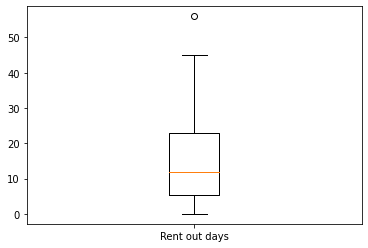

In [9]:
#fig = plt.figure(figsize =(10, 7))
plt.boxplot(rentout_hybel['rentout_days'], labels=['Rent out days'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff59f6d2d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff59f6e3310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff59f6d2a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff59f6e3850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff59f6e3b20>],
 'means': []}

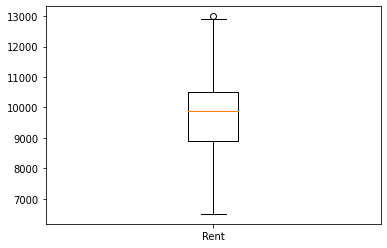

In [10]:
plt.boxplot(rentout_hybel['price'], labels=['Rent'])

In [11]:
rentout_hybel['price'].describe()

count       87.000000
mean      9831.022989
std       1379.947210
min       6500.000000
25%       8900.000000
50%       9900.000000
75%      10500.000000
max      13000.000000
Name: price, dtype: float64

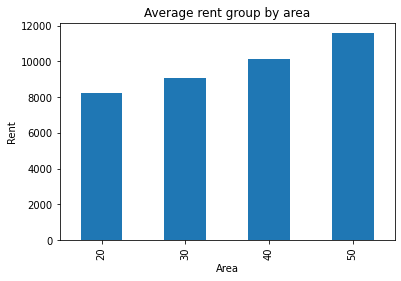

In [12]:
#Average rent group by area
df_price_groupby=rentout_hybel.groupby(['area_range'])['price'].mean()

ax = df_price_groupby.plot(kind='bar');
ax.set_alpha(0.8)
ax.set_title("Average rent group by area")
ax.set_ylabel("Rent");
ax.set_xlabel("Area");
plt.show()

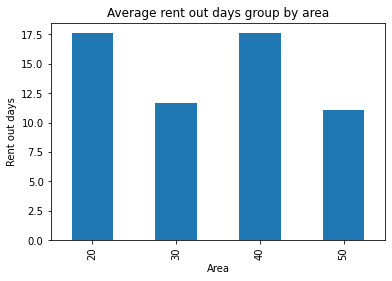

In [13]:
#Average rent group by area
df_price_groupby=rentout_hybel.groupby(['area_range'])['rentout_days'].mean()

ax = df_price_groupby.plot(kind='bar');
ax.set_alpha(0.8)
ax.set_title("Average rent out days group by area")
ax.set_ylabel("Rent out days");
ax.set_xlabel("Area");
plt.show()

<AxesSubplot:title={'center':'Number of hybel group by area'}, xlabel='Area', ylabel='Number'>

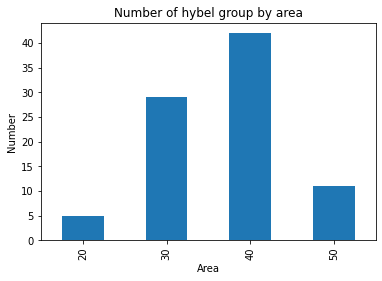

In [14]:
rentout_hybel.groupby(['area_range']).size().plot(kind = "bar", xlabel="Area", ylabel="Number", title="Number of hybel group by area")

# Load house data

In [15]:
path="../data"
house_df = pd.read_csv(os.path.join(path,"house.csv"))
house_df

,title,address,area,price,date,rent_out,rent_date,url
0,Liten enebolig (Hytte) i Lommedalen,"Kirkebyveien 129, Lommedalen",60,9000,11-01-2022,True,12-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=244371097
1,Kjedet enebolig med egen hage og garasje,"Terrasseveien 46c, Høvik",168,29000,11-01-2022,True,22-02-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=243858499
2,Lite hus på Høvik - parkeringsplass og strøm inkludert,"Gamle Drammensvei 92, Høvik",48,13900,11-01-2022,True,12-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=164190157
3,Lite hus til leie på Bekkestua,"BRAGEVEIEN 3 B, Bekkestua",45,12500,11-01-2022,True,15-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=113919380
4,Meget attraktivt beliggende dels nyoppusset bolig med stor hage og garasje. Gode solforhold. Nær OIS. Ledig omgående.,"Revesporet 5 A, Hosle",137,19000,11-01-2022,True,10-03-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=243512328
5,Enebolig - idyllisk og nyrenovert,"Jongsalleen 3, Sandvika",125,19500,11-01-2022,True,19-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=236484771
6,ENEBOLIG TIL LEIE I BÆRUM /HOUSE FOR RENT IN BÆRUM,"25 Trudvangkroken, Stabekk",177,17000,11-01-2022,True,15-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=238288260
7,TANUM - Korttidsleie - Meget pen enebolig med hage - 4 sov - 3 plan - 2 bad - - Dobbelgarasje - Markanært - Ledig omgående,"Tanumveien 54 A, Slependen",191,24000,11-01-2022,True,25-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=241959757
8,Lekker enebolig med svømmebasseng - 5 soverom - Tilgang til private strender - Usjenert vintergrønn hage - Klar for overtagelse,"Hundsundveien 33, Snarøya",253,52000,11-01-2022,NaN,NaN,https://www.finn.no/realestate/lettings/ad.html?finnkode=241104843
9,"Fullt møblert & utstyrt, for prosjekt/bedrift, 8 soverom, 2 bad, st. kjøkken, stue. 500 m fra Lysaker St","Marstranderveien 9, Stabekk",149,44000,11-01-2022,True,12-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=71937765


In [16]:
rentout_house=house_df[(house_df["rent_out"]==True) & (house_df["date"]>'11-01-2022')]
rentout_house=house_df[(house_df["rent_out"]==True)]
rentout_house

,title,address,area,price,date,rent_out,rent_date,url
0,Liten enebolig (Hytte) i Lommedalen,"Kirkebyveien 129, Lommedalen",60,9000,11-01-2022,True,12-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=244371097
1,Kjedet enebolig med egen hage og garasje,"Terrasseveien 46c, Høvik",168,29000,11-01-2022,True,22-02-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=243858499
2,Lite hus på Høvik - parkeringsplass og strøm inkludert,"Gamle Drammensvei 92, Høvik",48,13900,11-01-2022,True,12-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=164190157
3,Lite hus til leie på Bekkestua,"BRAGEVEIEN 3 B, Bekkestua",45,12500,11-01-2022,True,15-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=113919380
4,Meget attraktivt beliggende dels nyoppusset bolig med stor hage og garasje. Gode solforhold. Nær OIS. Ledig omgående.,"Revesporet 5 A, Hosle",137,19000,11-01-2022,True,10-03-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=243512328
5,Enebolig - idyllisk og nyrenovert,"Jongsalleen 3, Sandvika",125,19500,11-01-2022,True,19-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=236484771
6,ENEBOLIG TIL LEIE I BÆRUM /HOUSE FOR RENT IN BÆRUM,"25 Trudvangkroken, Stabekk",177,17000,11-01-2022,True,15-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=238288260
7,TANUM - Korttidsleie - Meget pen enebolig med hage - 4 sov - 3 plan - 2 bad - - Dobbelgarasje - Markanært - Ledig omgående,"Tanumveien 54 A, Slependen",191,24000,11-01-2022,True,25-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=241959757
9,"Fullt møblert & utstyrt, for prosjekt/bedrift, 8 soverom, 2 bad, st. kjøkken, stue. 500 m fra Lysaker St","Marstranderveien 9, Stabekk",149,44000,11-01-2022,True,12-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=71937765
10,Bærums Verk - Herskapelig enebolig med stor og solrik tomt. Inkl. brøyting.,"LOMMEDALSVEIEN 149, Bærums Verk",300,23000,11-01-2022,True,25-01-2022,https://www.finn.no/realestate/lettings/ad.html?finnkode=237626108


In [17]:
rentout_days=rentout_house.apply(lambda x: delta_days(x.date, x.rent_date), axis=1)
rentout_days.mean()

18.62962962962963